In [19]:
import pandas as pd
from statsmodels.stats.weightstats import _tconfint_generic
from math import sqrt
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import chi2_contingency

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

    LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
    SEX: пол клиента (1 = мужской, 2 = женский )
    EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
    MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
    AGE: возраст в годах
    PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
    BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
    PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
    default - индикатор невозврата денежных средств

In [7]:
df = pd.read_csv("credit_card_default_analysis.csv")
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


1. Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [8]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [9]:
LIMIT_BAL0 = df[df.default==0]['LIMIT_BAL'].values
LIMIT_BAL1 = df[df.default==1]['LIMIT_BAL'].values

In [10]:
ctr_median_scores = np.asarray(list(map(np.median, get_bootstrap_samples(LIMIT_BAL0, 100))))
exp_median_scores = np.asarray(list(map(np.median, get_bootstrap_samples(LIMIT_BAL1, 100))))

print("95% confidence interval:",  stat_intervals(exp_median_scores - ctr_median_scores, 0.05))

95% confidence interval: [-70000. -60000.]


95% интервал разности медиан значений кредитного лимита в группах тех, кто вернул кредит и тех, кто не вернул,не содержит нуля => на уровне значимости 0.05 отвергаем гипотезу о равенстве медианных значений в этих группах

In [11]:
np.median(LIMIT_BAL0), np.median(LIMIT_BAL1)

(150000.0, 90000.0)

Результаты значимы практически, потому что разница между медианами этих друх групп очень большая по деньгам

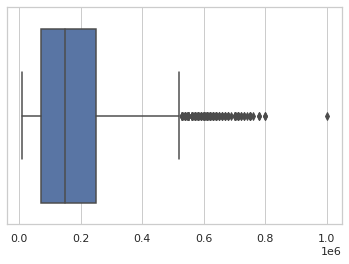

In [52]:
import seaborn as sns

sns.set(style="whitegrid")
ax = sns.boxplot(x=LIMIT_BAL0)

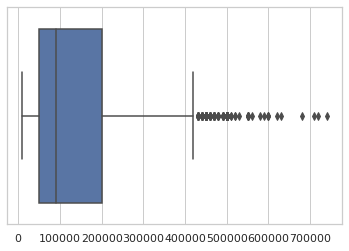

In [53]:
ax = sns.boxplot(x=LIMIT_BAL1)

Точечная оценка медиан говорит о том, что медиана размер кредитного лимита больше у тех, кто вернул кредит

In [35]:
LIMIT_BAL0_median_scores = list(map(np.median, get_bootstrap_samples(LIMIT_BAL0, 1000)))
LIMIT_BAL1_median_scores = list(map(np.median, get_bootstrap_samples(LIMIT_BAL1, 1000)))

alpha = 0.01
print(f"{(1.-alpha)*100}% confidence interval for the LIMIT_BAL median of whom returned credit:",  stat_intervals(LIMIT_BAL0_median_scores, alpha))
print(f"{(1.-alpha)*100}%  confidence interval for the LIMIT_BAL median of whom didn't returned credit:",  stat_intervals(LIMIT_BAL1_median_scores, alpha))

99.0% confidence interval for the LIMIT_BAL median of whom returned credit: [150000. 150000.]
99.0%  confidence interval for the LIMIT_BAL median of whom didn't returned credit: [ 80000. 100000.]


In [41]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(LIMIT_BAL1_median_scores, LIMIT_BAL0_median_scores)))
alpha = 0.01
print(f"{(1.-alpha)*100}% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

99.0% confidence interval for the difference between medians [60000. 70000.]


Доверительные интервалы не пересекаются => отвергаем нулевую гипотезу о равенстве медиан с уровнем доверия 0.01

 b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [ ]:
pass

2. Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия) 

In [53]:
SEX0 = df[df.default==0]['SEX'].values - 1
SEX1 = df[df.default==1]['SEX'].values - 1

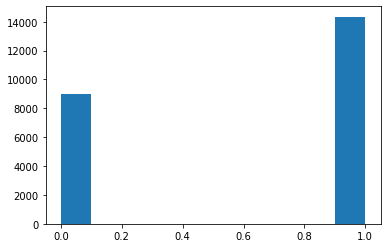

In [47]:
plt.hist(SEX0);

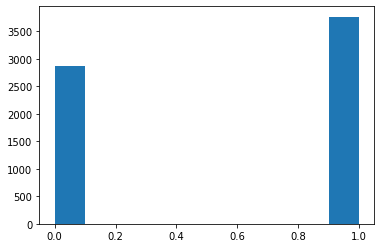

In [49]:
plt.hist(SEX1);

Женщин больше среди тех, кто вернул и кто не вернул кредит

In [39]:
from statsmodels.stats.proportion import proportion_confint
for sex in [SEX0, SEX1]:
    normal_interval = proportion_confint(sum(sex), len(sex), method = 'normal')
    print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                      normal_interval[1], 
                                                      normal_interval[1] - normal_interval[0]))

normal_interval [0.607908, 0.620392] with width 0.012484
normal_interval [0.555137, 0.578980] with width 0.023843


Доверительные интервалы не пересекаются => отвергаем нулевую гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит не отличается друг от друга с уровнем доверия 0.05

In [57]:
matr = [[SEX0.sum(), -(SEX0 - 1).sum()], [SEX1.sum(), -(SEX1 - 1).sum()]]
chi2_contingency(matr)[1]

4.944678999412026e-12

p-value << 0.05 => отвергаем нулевую гипотезу

3. Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ? 

In [13]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

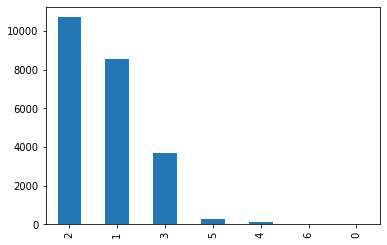

In [17]:
df.loc[df.default==0, 'EDUCATION'].value_counts().plot(kind='bar')

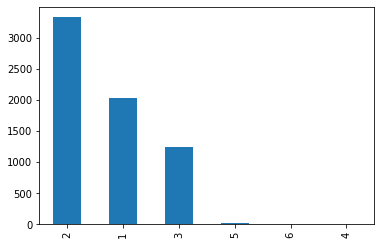

In [18]:
df.loc[df.default==1, 'EDUCATION'].value_counts().plot(kind='bar')

In [38]:
df.loc[df.default==0, 'EDUCATION'].value_counts().to_frame()

,EDUCATION
2,10700
1,8549
3,3680
5,262
4,116
6,43
0,14


In [40]:
df.loc[df.default==1, 'EDUCATION'].value_counts().to_frame()

,EDUCATION
2,3330
1,2036
3,1237
5,18
6,8
4,7


распределения визуально отличаются только масштабом

In [82]:
x1 = df.loc[df.default==0, 'EDUCATION'].value_counts().to_frame()
x2 = df.loc[df.default==1, 'EDUCATION'].value_counts().to_frame()
matr = x1.join(x2, how='left', lsuffix='0', rsuffix='1').fillna(0)
matr = matr.values.T

In [85]:
res = chi2_contingency(matr)
p_value = res[1]
expected = res[3]

In [86]:
print(f"p-values = {p_value}")

p-values = 1.2332626245415605e-32


Достигаемый уровень значимости < 0.05 => отвергаем нулевую гипотезу. Образование влияет на возрват долга по этим данным

In [87]:
x1 = df.loc[df.default==0, 'EDUCATION'].value_counts().to_frame()
x2 = df.loc[df.default==1, 'EDUCATION'].value_counts().to_frame()
matr = x1.join(x2, how='left', lsuffix='0', rsuffix='1').fillna(0)

In [88]:
matr

,EDUCATION0,EDUCATION1
2,10700,3330.0
1,8549,2036.0
3,3680,1237.0
5,262,18.0
4,116,7.0
6,43,8.0
0,14,0.0


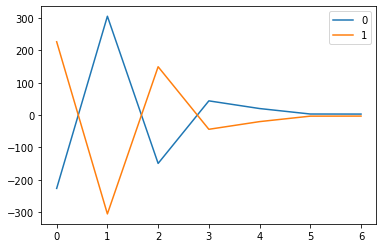

In [92]:
pd.DataFrame((matr.values.T - expected).T).plot()

4. Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [79]:
x1 = df.loc[df.default==0, 'MARRIAGE'].value_counts().to_frame()
x2 = df.loc[df.default==1, 'MARRIAGE'].value_counts().to_frame()

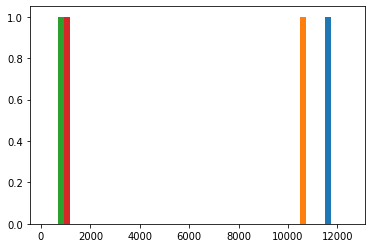

In [80]:
plt.hist(x1);

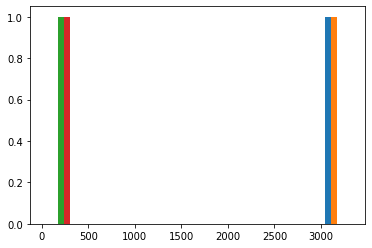

In [81]:
plt.hist(x2);

In [59]:
matr = x1.join(x2, how='left', lsuffix='0', rsuffix='1').fillna(0)
matr = matr.values.T
chi2_contingency(matr)[1]


8.825862457577375e-08

5. Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [60]:
AGE0 = df[df.default==0]['AGE'].values
AGE1 = df[df.default==1]['AGE'].values

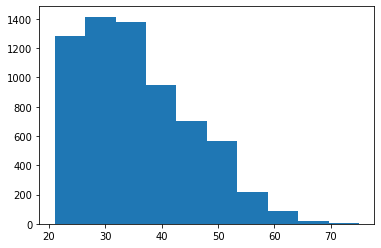

In [77]:
plt.hist(AGE1);

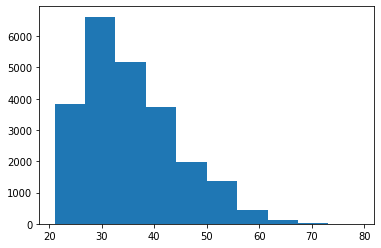

In [78]:
plt.hist(AGE0);

In [74]:
AGE0_median_scores = list(map(np.median, get_bootstrap_samples(AGE0, 10000)))
AGE1_median_scores = list(map(np.median, get_bootstrap_samples(AGE1, 10000)))

alpha = 0.05
print(f"{(1.-alpha)*100}% confidence interval for the AGE median of whom returned credit: {stat_intervals(AGE0_median_scores, alpha)}")
print(f"{(1.-alpha)*100}%  confidence interval for the AGE median of whom didn't returned credit: {stat_intervals(AGE1_median_scores, alpha)}")

95.0% confidence interval for the AGE median of whom returned credit: [34. 34.]
95.0%  confidence interval for the AGE median of whom didn't returned credit: [34. 35.]


интервалы не пересекаются => отвергаем гипотезу о равенстве медиан с уровнем значимости 0.05